In [1]:
import pandas as pd
import plotly.express as px

from pymorphy2 import MorphAnalyzer
from nltk import sent_tokenize, word_tokenize, regexp_tokenize

# Исследование надёжности заёмщиков

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-анализ-данных" data-toc-modified-id="Загрузка-и-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена типа данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лемматизация</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Категоризация данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-влияния-параметров-на-возврат-кредита" data-toc-modified-id="Анализ-влияния-параметров-на-возврат-кредита-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ влияния параметров на возврат кредита</a></span><ul class="toc-item"><li><span><a href="#Какова-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Какова-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Какова зависимость между наличием детей и возвратом кредита в срок?</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Какова-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Какова-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Какова зависимость между семейным положением и возвратом кредита в срок?</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Какова-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Какова-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какова зависимость между уровнем дохода и возвратом кредита в срок?</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, какие параметры влияют на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

## Загрузка и анализ данных

In [2]:
# путь к документу:
path = 'E:\\Python\\datasets\\'

In [3]:
data = pd.read_csv(path + 'credit_debt.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<ins>***Описание данных***</ins>
- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита

In [5]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [6]:
data.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [7]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Вывод

При первом взгляде на исходные данные можно заметить следующее:  
- в столбце days_employed (общий трудовой стаж в днях) часть значений отрицательны, необходимо разобраться что это значит;
- среднее значение  в столбце days_employed (общий трудовой стаж в днях) - 63046 дня (173 года). Кто-то очень долго работал;
- у кого-то в столбце dob_years (возраст) указан возраст 0. Скорее всего возраст просто не указан;
- в столбце education для одного уровня образования есть название "Среднее", "среднее" и "СРЕДНЕЕ", необходимо привести все данные к одному регистру;  
- в некоторых столбцах явно пропущенные данные, так как количество записей в них отличается от других;
- с первого взгляда удивляет максимальное значение количества детей (20!),а так же что значит отрицательный показатель в этом столбце.

## Предобработка данных

### Обработка пропусков

In [8]:
# Посчитать в каждом столбце отсутствующие значения
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Одинаковое количество отсутствующих значений в столбце days_employed и total_income. А нет ли тут закономерности.

In [9]:
data[(data['days_employed'].isnull() == True) & (data['total_income'].isnull() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
children            2174 non-null int64
days_employed       0 non-null float64
dob_years           2174 non-null int64
education           2174 non-null object
education_id        2174 non-null int64
family_status       2174 non-null object
family_status_id    2174 non-null int64
gender              2174 non-null object
income_type         2174 non-null object
debt                2174 non-null int64
total_income        0 non-null float64
purpose             2174 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Так и есть, для людей у кого пропущенно значение в столбце days_employed также отсутствует значение в столбце total_income.

Выясним, из-за кого создается такое аномальное значение среднего стажа.

In [10]:
data_grouped = data.groupby('income_type').agg({'days_employed':['count', 'mean']})
data_grouped

days_employed               
                        count           mean
income_type                                 
безработный                 2  366413.652744
в декрете                   1   -3296.759962
госслужащий              1312   -3399.896902
компаньон                4577   -2111.524398
пенсионер                3443  365003.491245
предприниматель             1    -520.848083
сотрудник               10014   -2326.499216
студент                     1    -578.751554

Из таблицы можно увидеть:  
1. Что положительные значения среднего стажа работы только у двух категорий, у остальных они отрицательные. В таком случае мы безболезненно можем взять все значения этого столбца по модулю.
1. Что сразу две категории занятых имеют аномально высокое среднее значение стажа.

Выясним, а у многих ли клиентов такое анамально большой стаж. Если их всего пару человек, тогда мы просто исключим из нашего анализа. Что взять в качестве критерия нормальности стажа работы? Средняя продолжительность жизни у мужчин в России 78,5 лет. Если предположить, что мужчина начал работать в 16 лет, то его макимально возможный трудовой стаж составит 62,5 года или 22 813 дней.

In [11]:
strange_value = data[(data['days_employed'] > 22813)]
strange_value.shape[0]

3445

Мы видим, что 3445 клиента из базы (все безработные и пенсионеры) имеют аномально большое значение стажа работы. Просто проигнорировать их не получиться. Посчитать среднее значение для этой категории также представляется бесполезным.

Ошибка могла возникнуть входе выгрузки информации. Предположим, что для этих двух категорий клиентов стаж перевелся не в дни, а часы. Тогда среднее значение стажа для категории безработный составит 15267,21 дней или 41,83 года. Что уже более правдоподобно. Таким образом примем теорию, что это все же часы, а не дни и произведем необходимые преобразования в таблице.

In [12]:
# функция, которая сделает перерасчет для безработных и пенсионеров стаж из часов в дни
def conversion_days_employed(df):
    if df['income_type'] == 'безработный':
        return df['days_employed'] / 24
    elif df['income_type'] == 'пенсионер':
        return df['days_employed'] / 24
    else:
        return df['days_employed']
data['days_employed'] = data.apply(conversion_days_employed, axis=1)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Проверим, к какой категории по типу занятости относятся наши клиенты, для которых в столбцах 'days_employed' и 'income_type' пропущены значения:

In [13]:
data[(data['days_employed'].isnull() == True) & (data['total_income'].isnull() == True)]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Интересно, а какие впринципе типы занятости представлены в наших данных

In [14]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Итак почти во всех категориях по типу занятости замечены пропуски данных. Для решения этой проблемы заменим пропуски медианным значением соответствующей категории типа занятости.

In [15]:
# избавимся от отрицательных значений
data[['days_employed', 'total_income']] = data[['days_employed', 'total_income']].abs()

# найдем медианное значение для каждой группы занятых и замением пропуски в столбце 'days_employed' на медианное значение
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))

# аналогично поступим со столбцом 'total_income'
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

Проверим наши данные на наличие пропусков:

In [16]:
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропусков нет, идем дальше.

Приведем строки к нижнему регистру:

In [17]:
data['education'] = data['education'].str.lower()

Разберемся с клиентами с нулевым возрастом.

In [18]:
print('Количество людей с нулевым возрастом:', data[data['dob_years'] == 0]['dob_years'].count())

Количество людей с нулевым возрастом: 101


Врятли они могли не указать свой возраст, так как они передавали данные для получения кредита. Либо произошла очередная ошибка при выгрузке базы данных, либо машина автоматически причислила их к группе граждан, чей возраст ей "малоинтересен", например несовершеннолетние. Проверим, сколько несовершеннолетних граждан обращалось за кредитом (Статья 60 Конституции гласит, что совершеннолетие наступает в 18 лет)

In [19]:
print('Количество несовершеннолетних:', data[data['dob_years'] < 18]['dob_years'].count())

Количество несовершеннолетних: 101


Итак, количество строк совпадает, так что скорее всего 0 отмечены те граждане, кто не достиг 18 летнего возраста. Если это так, то скорее всего целью их кредита должно было быть обучение, проверим.

In [20]:
data[data['dob_years'] < 18]['purpose'].value_counts().head(10)

операции с жильем             6
покупка жилья                 6
жилье                         6
сыграть свадьбу               5
свадьба                       5
на покупку автомобиля         5
недвижимость                  4
на проведение свадьбы         4
автомобиль                    4
покупка жилой недвижимости    3
Name: purpose, dtype: int64

Мы видим что клиенты с нулевым возрастом получали кредиты на самые разные цели, врятли несовершеннолетнему дадут кредит на автомобиль или жилье. Значит наша гипотеза не подтвердилась.  
В таком случае воспользуемся проверенным способом и заменим 0 на средний возраст по группе занятости.

In [21]:
data['dob_years'] = data['dob_years'].replace(0, data.groupby('income_type')['dob_years'].transform('mean')).astype('int')
# сразу преобразуем вставляемые значения к типу int
# выполним проверку
print('Количество людей с нулевым возрастом:', data[data['dob_years'] == 0]['dob_years'].count())

Количество людей с нулевым возрастом: 0


Разберемся с количеством детей.

In [22]:
print('Количество людей с -1 ребенком:', data[data['children'] == -1]['children'].count())
print('Количество людей без детей:', data[data['children'] == 0]['children'].count())
print('Количество людей с 1 ребенком:', data[data['children'] == 1]['children'].count())
print('Количество людей с 20 детьми:', data[data['children'] == 20]['children'].count())
print('Количество людей с 2 детьми:', data[data['children'] == 2]['children'].count())
print('Количество многодетных людей:', data[data['children'] > 2]['children'].count())

Количество людей с -1 ребенком: 47
Количество людей без детей: 14149
Количество людей с 1 ребенком: 4818
Количество людей с 20 детьми: 76
Количество людей с 2 детьми: 2055
Количество многодетных людей: 456


47 строк со значением -1 по количеству детей. Заменим это значение на 1. Вдруг был очередной сбой при выгрузке. Статистику это нам не испортит, но выглядеть будет правдоподобно.  
20 детей встречается 76 раз, отнесем их в дальнейшем к группе многодетных.

In [23]:
data['children'] = data['children'].replace(-1, 1)

Проверим, какие значения выбора пола занимателя присутствуют в нашей таблице:

In [24]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Итак, есть строка, по которой мы не знаем кто совершил заем. Сложно определить кто совершил этот заем, так что просто удалим эту строчку, наши дальнейшие исследования от этого не пострадают.

In [25]:
data = data.drop(data[data['gender'] == 'XNA'].index)

In [26]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,2.152400e+04
mean,0.543301,4600.639955,43.496144,0.817181,0.972542,0.080886,1.652235e+05
std,1.379903,5354.456744,12.229884,0.548092,1.420357,0.272667,9.804559e+04
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.522620,34.000000,1.000000,0.000000,0.000000,1.077960e+05
50%,0.000000,1993.171525,43.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,5347.525014,53.000000,1.000000,1.000000,0.000000,1.955452e+05
max,20.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


#### Вывод  
Все пропуски заполнены,от странных значений избавились. Идем дальше

### Замена типа данных

In [27]:
data.dtypes

children              int64
days_employed       float64
dob_years             int32
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Переведем общий трудовой стаж в днях 'days_employed' и ежемесячный доход 'total_income' в целочисленные значения

In [28]:
data[['days_employed', 'total_income']] = data[['days_employed', 'total_income']].astype(int)

In [29]:
data.dtypes

children             int64
days_employed        int32
dob_years            int32
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int32
purpose             object
dtype: object

#### Вывод  
Мы представили данные в логическом, а главное в удобном для дальнейшего анализа формате

### Обработка дубликатов

Проверим наши данные на наличие дубликатов

In [30]:
print ('Дубликатов в таблице:', data.duplicated().sum())

Дубликатов в таблице: 71


Удаляем их

In [31]:
data = data.drop_duplicates().reset_index(drop = True)

Проверяем

In [32]:
print ('Дубликатов в таблице:', data.duplicated().sum())

Дубликатов в таблице: 0


#### Вывод  
Мы удалили из наших данных явные повторы

### Лемматизация

In [33]:
print('В столбце "purpose" (цель кредита)', data['purpose'].value_counts().count(), 'уникальные записи')

В столбце "purpose" (цель кредита) 38 уникальные записи


In [34]:
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Итак, мы имеем 38 уникальные формулировки цели получения кредита, однако по факту часто одна и та же цель сформулирована разными фразами. Постараемся убрать похожие друг на друга цели, но выраженные разными словами.

Выделим отдельные категории цели получения кредита (свадьба, жилье, автомобиль, образование) и добавим их в отдельный столбец 'purpose_category'.

In [35]:
def tokenize_n_normalize(sent, pat = r"(?u)\b\w\w+\b", morph = MorphAnalyzer()):
    return [morph.parse(tok)[0].normal_form for tok in regexp_tokenize(sent, pat)]

In [36]:
data['purpose_category'] = data['purpose'].map(lambda x: list(tokenize_n_normalize(x)))

In [37]:
def purpose_categorization(text):
    if 'автомобиль' in text:
        return 'автомобиль'
    if 'свадьба' in text:
        return 'свадьба'
    if 'образование' in text:
        return 'образование'
    if 'жильё' in text:
        return 'жильё'
    if 'недвижимость' in text:
        return 'недвижимость'

data['purpose_category'] = data['purpose_category'].apply(purpose_categorization)

In [38]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жильё
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жильё
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


#### Вывод  
Мы избавились от неявных повторов в целях приобретения кредита воспользовавшись лемматизацией и разбив все цели на 5 уникальных категорий

### Категоризация данных

Для ответа на интересующий на вопрос о влиянии количества детей и семейного положения на факт погашения кредита проведем категоризацию данных о количестве детей, ежемесячном доходе и проверим правильность существующей категоризации по семейному положению.

In [39]:
def children_categorization(children):
    if children == 0:
        return 'детей нет'
    if 0 < children <= 2:
        return '1 - 2 ребенка'
    return 'многодетные'

In [40]:
# Создадим отдельный столбец с категориями по количеству детей, и в его ячейках запишем значения, возвращаемые функцией.
data['children_category'] = data['children'].apply(children_categorization)

Федеральная служба государственной статистики разделяет уровень жизни россиян в зависимости от доходов на следующие категории:  
• крайняя нищета (доходы ниже прожиточного минимума — до 7-8 тыс.р.)  
• нищета (доходы от одного до двух прожиточных минимума — от 8 до 12 тыс.р.)  
• бедность (доходы от 12 до 20 тысяч рублей в месяц)  
• выше бедности (доходы от 20 до 30 тысяч рублей в месяц)  
• средний достаток — (доходы от 30 до 60 тысяч рублей в месяц)  
• состоятельные — (доходы от 60 до 90 тысяч рублей в месяц)  
• богатые — (доходы от 90 тысяч рублей в месяц)  
• сверхбогатые — (доходы свыше 150 тысяч рублей в месяц)

In [41]:
def total_income_categorization(total_income):
    if total_income < 8000:
        return 'крайняя нищета'
    if 8000 <= total_income < 12000:
        return 'нищета'
    if 12000 <= total_income < 20000:
        return 'бедность'
    if 20000 <= total_income < 30000:
        return 'выше бедности'
    if 30000 <= total_income < 60000:
        return 'средний достаток'
    if 60000 <= total_income < 90000:
        return 'состоятельные'
    if 90000 <= total_income < 150000:
        return 'богатые'
    return 'сверхбогатые'

In [42]:
# Создадим отдельный столбец с категориями по  доходу, и в его ячейках запишем значения, возвращаемые функцией.
data['total_income_category'] = data['total_income'].apply(total_income_categorization)

In [43]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жильё,1 - 2 ребенка,сверхбогатые
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,1 - 2 ребенка,богатые
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жильё,детей нет,богатые
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,многодетные,сверхбогатые
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,детей нет,сверхбогатые


In [44]:
family_dict = data[['family_status', 'family_status_id']]
family_dict = family_dict.drop_duplicates().reset_index(drop = True)
family_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


#### Вывод  
Мы проверили правильность категоризации по типу (по признаку семейного положения) и выполнили категоризацию по признаку количество детей, ежемесячного дохода.

## Анализ влияния параметров на возврат кредита

### Какова зависимость между наличием детей и возвратом кредита в срок?

,children_category,Кол-во клиентов,Кол-во должников,% невозврата
0,1 - 2 ребенка,6907,639,0.092515
1,детей нет,14090,1063,0.075444
2,многодетные,456,39,0.085526


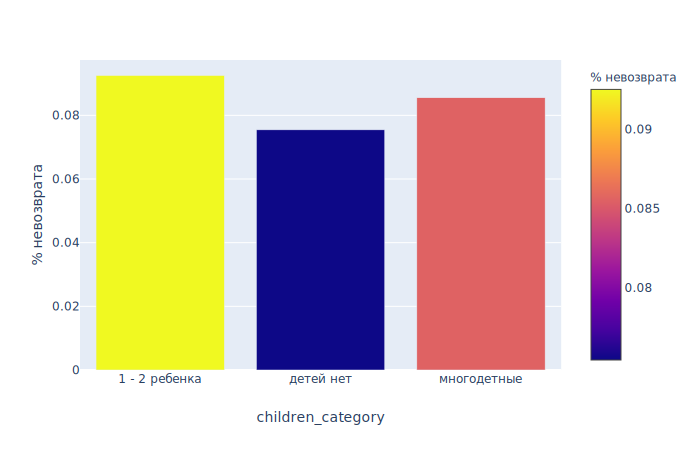

In [45]:
status_pivot1 = data.pivot_table(index = 'children_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
status_pivot1.columns = ['children_category', 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
display(status_pivot1)

fig = px.bar(status_pivot1, x = 'children_category', y = '% невозврата', color = '% невозврата')
fig.show(renderer='svg')

#### Вывод  
Как мы видим,между 0 и 1 ребенком происходит довольно ощутимый скачок невозвратов, с 7 до 9 %, делаем вывод, что наличие детей, именно наличие, играет существенную роль. А вот если мы начнем изучать кол-во детей, то заметим, что % варьируется от ребенка к ребенку, но он не такой существенный как факт наличия ребенка, но все же также значим. Видим, что выделяется группа семей с >= тремя детьми, она наиболее безопасная (если не учитывать семьи без детей).

### Какова зависимость между семейным положением и возвратом кредита в срок?

,family_status,Кол-во клиентов,Кол-во должников,% невозврата
0,Не женат / не замужем,2810,274,0.097509
1,в разводе,1195,85,0.071130
2,вдовец / вдова,959,63,0.065693
3,гражданский брак,4150,388,0.093494
4,женат / замужем,12339,931,0.075452


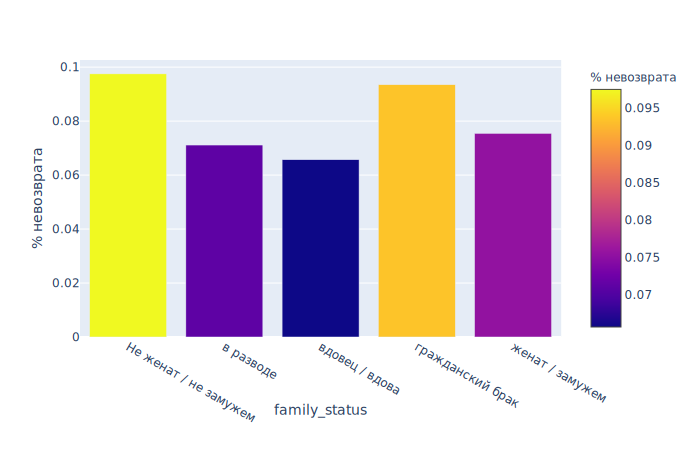

In [46]:
status_pivot2 = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
status_pivot2.columns = ['family_status', 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
display(status_pivot2)

fig = px.bar(status_pivot2, x = 'family_status', y = '% невозврата', color = '% невозврата')
fig.show(renderer='svg')

#### Вывод  
Как можно заметить, статус официальности отношений положительно сказывается на возврате кредита. Люди, которые не состоят в официальных отношениях и никогда не состояли хуже возвращают кредиты, в отличии от семей, которые имеют официальный статус, пусть даже когда-то в прошлом.

### Какова зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category,Кол-во клиентов,Кол-во должников,% невозврата
0,богатые,8275,716,0.086526
1,выше бедности,22,2,0.090909
2,сверхбогатые,9830,763,0.077620
3,состоятельные,2542,213,0.083792
4,средний достаток,784,47,0.059949


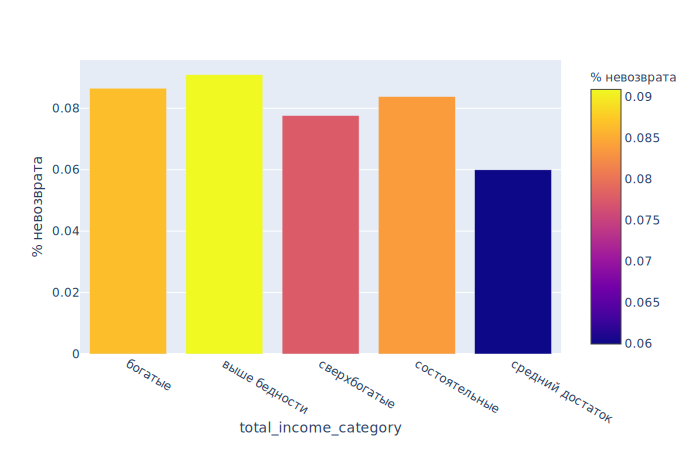

In [47]:
status_pivot3 = data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
status_pivot3.columns = ['total_income_category', 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
display(status_pivot3)

fig = px.bar(status_pivot3, x = 'total_income_category', y = '% невозврата', color = '% невозврата')
fig.show(renderer='svg')

#### Вывод  
Клиенты со средним доходом в пределах 30 тыс. хуже всех возвращают кредиты. Ниже всех процент невозврата у клиентов, чей средний заработок находится в пределах 30 - 60 тыс.

### Как разные цели кредита влияют на его возврат в срок?

,purpose_category,Кол-во клиентов,Кол-во должников,% невозврата
0,автомобиль,4306,403,0.093590
1,жильё,4460,308,0.069058
2,недвижимость,6350,474,0.074646
3,образование,4013,370,0.092200
4,свадьба,2324,186,0.080034


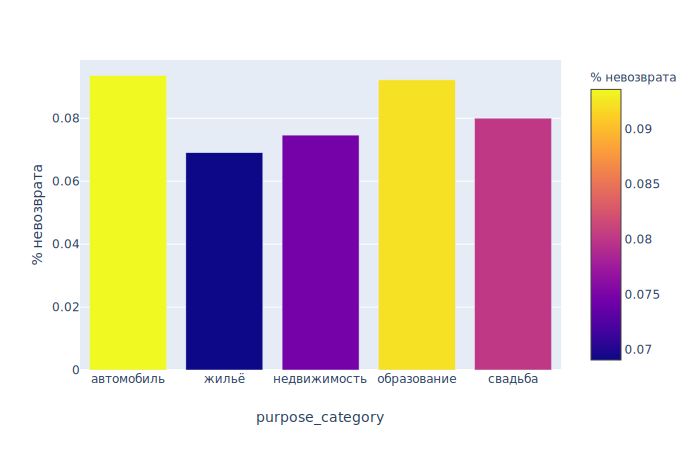

In [48]:
status_pivot4 = data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
status_pivot4.columns = ['purpose_category', 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
display(status_pivot4)

fig = px.bar(status_pivot4, x = 'purpose_category', y = '% невозврата', color = '% невозврата')
fig.show(renderer='svg')

#### Вывод  
Наиболее рисковые цели это образование и автомобиль, тогда как свадьба и недвижимость напротив, являются наиболее безопасными целями.

## Общий вывод

Отвечая на вопрос "влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок", с уверенностью можно заявить: влияет. Так, в ходе анализа данных, представленных кредитным отделом банка, было  выявлено, что люди, состоящие или состоявшие ранее в браке, и без детей самые надежные клиенты.  
Однако стоит отметить, что для составления более объективного портрета нужно изучать совокупность признаков.